# Notebook for Alura data-analysis and visualization course

## 1. Data Science: data and visualization

In [1]:
msg="Hello world"
print(msg)

Hello world


In [3]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [6]:
import os

print(os.getcwd())

c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization


### Open straight from zip

OBS: functionality below to open csv from zip file isn't from course 

In [5]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('./data/ml-latest-small.zip') 
df = pd.read_csv(zf.open('ml-latest-small/ratings.csv'))
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Returning to course from here:

In [6]:
notas = df
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
type(notas)


pandas.core.frame.DataFrame

In [6]:
pd.__version__

'1.4.2'

In [7]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
type(notas['nota'])

pandas.core.series.Series

In [10]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [12]:
notas['nota'].mean()

3.501556983616962

In [15]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:>

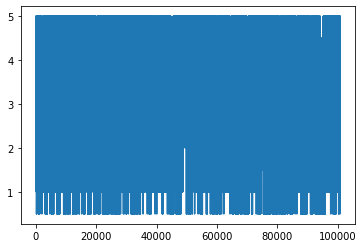

In [19]:
notas.nota.plot()

<AxesSubplot:ylabel='Frequency'>

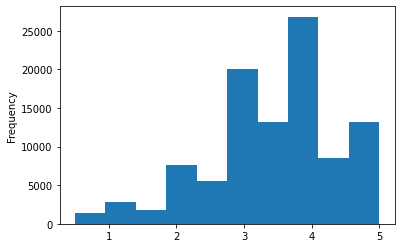

In [20]:
notas.nota.plot(kind='hist')

In [21]:
print("Média",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [22]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

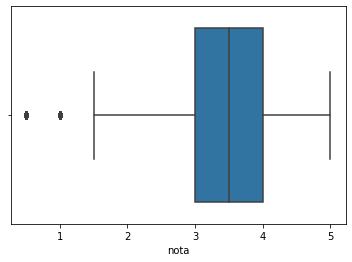

In [25]:
import seaborn as sns

sns.boxplot(x=notas.nota)

## 2. Exploratory analysis

In [1]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('./data/ml-latest-small.zip') 
df = pd.read_csv(zf.open('ml-latest-small/movies.csv'))
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes = df
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [11]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [12]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [13]:
notas.groupby("filmeId")

In [14]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [17]:
notas.groupby("filmeId").mean()['nota']

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [10]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

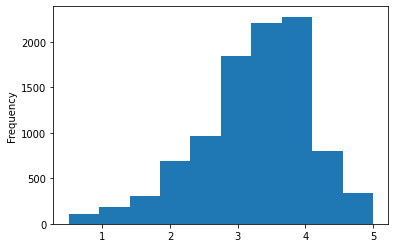

In [11]:
medias_por_filme.plot(kind="hist")

<AxesSubplot:xlabel='nota'>

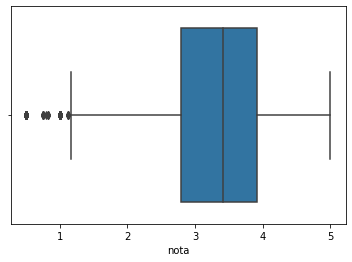

In [12]:
import seaborn as sns

sns.boxplot(x=medias_por_filme)

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

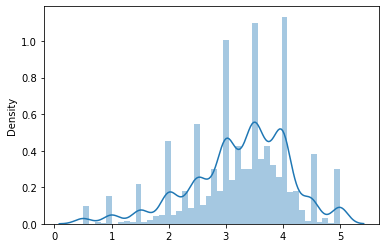

In [25]:
sns.distplot(x=medias_por_filme)

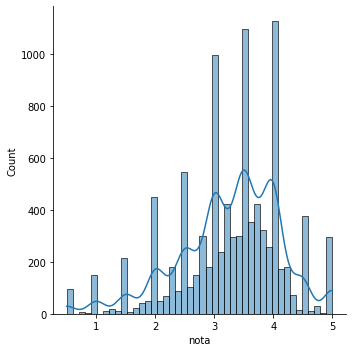

In [32]:
sns.displot(x=medias_por_filme, kde=True)

c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

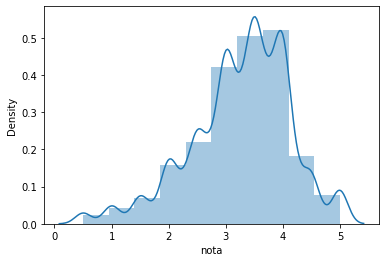

In [26]:
sns.distplot(medias_por_filme, bins=10)

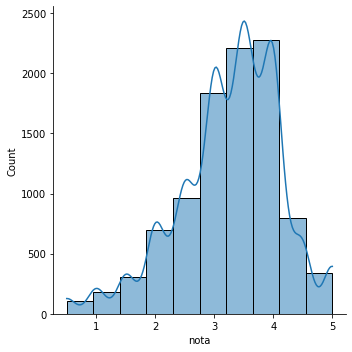

In [31]:
sns.displot(x=medias_por_filme, bins=10, kde=True)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

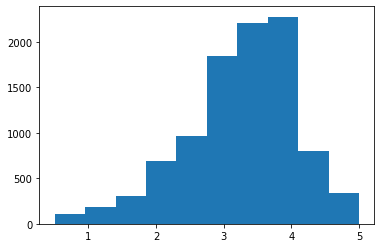

In [33]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

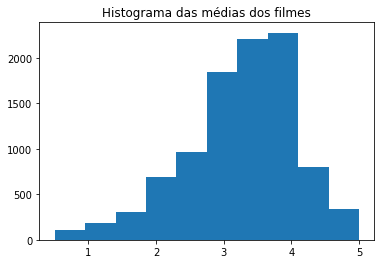

In [34]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

<AxesSubplot:ylabel='nota'>

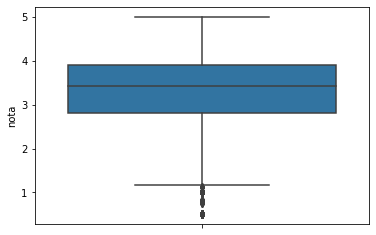

In [35]:
sns.boxplot(y=medias_por_filme)

<AxesSubplot:ylabel='nota'>

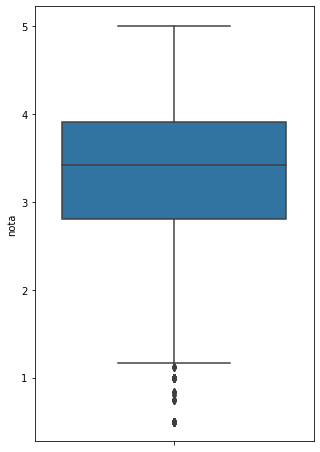

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

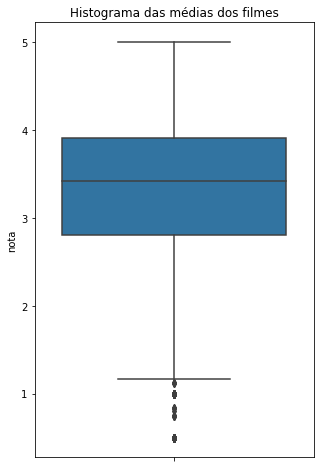

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

plt.title("Histograma das médias dos filmes")

## 3. Variables

I've used two ways of get the class' file online, both of them outside of class scope.

First, downloading the file using curl (straight to use in a Windows environment):
- `!curl -O --output-dir ./data https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula2.1/movies.csv`

Then I had found that from pandas 0.19.2 to date you can `read_csv` from url directly (and this is the way I'm using it here):
- `tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv")`

In [20]:
import pandas as pd

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv")
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [21]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

### Types of variable

**Categorical**:
- Nominal (as tmdb.original_language)
- Ordinal 
  - **off-course:** movie rating (like 0 to 10) would be an example of categorical ordinal variable, but movie rating *average* (like tmdb.vote_average) is **not** 
    - or, at least, it's a controversial topic, as well presented in this link: https://measuringu.com/mean-ordinal/

**Numeric (or quantitative)**
- Continuous (as tmdb.budget)
- Discrete (as tmdb.vote_count or tmdb.vote_average, as discussed above)

## 4. Data Visualization

In [1]:
import pandas as pd

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv")
tmdb.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [2]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [23]:
print(tmdb.original_language.value_counts().index,
'\n\n\n',
tmdb.original_language.value_counts().values)


Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object') 


 [4505   70   32   27   27   19   16   14   12   11   11    9    7    5
    4    4    3    3    2    2    2    2    2    1    1    1    1    1
    1    1    1    1    1    1    1    1    1]


In [3]:
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [4]:
print(type(tmdb.original_language.value_counts()), type(tmdb.original_language.value_counts().to_frame()) )

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [5]:
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


#### Contagem de lingua

In [6]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()

contagem_de_lingua.columns = ['original_language', 'total']

contagem_de_lingua.head(3)

,original_language,total
0,en,4505
1,fr,70
2,es,32


<AxesSubplot:xlabel='original_language', ylabel='total'>

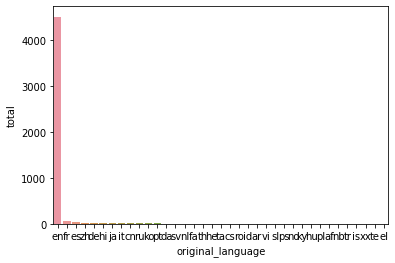

In [7]:
import seaborn as sns

sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

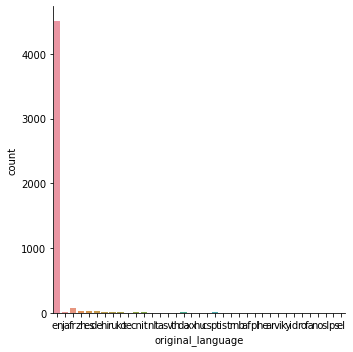

In [8]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x276fbfa5360>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

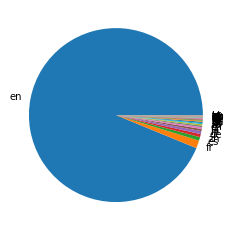

In [10]:
import matplotlib.pyplot as plt

plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

In [11]:
total_por_lingua = tmdb['original_language'].value_counts()

total_por_lingua.loc['en']

4505

#### totais e dados

In [12]:
total_por_lingua = tmdb['original_language'].value_counts()

total_geral = total_por_lingua.sum()

total_de_ingles = total_por_lingua.loc['en']

total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


In [13]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [14]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)

dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

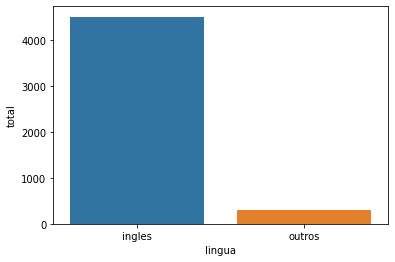

In [15]:
sns.barplot(data = dados, x = 'lingua', y = 'total')

([<matplotlib.patches.Wedge at 0x276fdad8ac0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

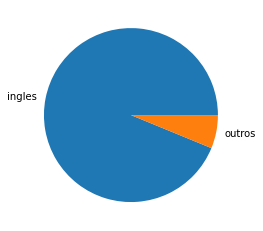

In [16]:
plt.pie(dados['total'], labels = dados['lingua'])

In [7]:
tmdb.query("original_language == 'en'").head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [8]:
tmdb.query("original_language != 'en'").head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143


In [19]:
tmdb.query("original_language != 'en'").original_language.value_counts()

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

#### filmes sem ingles

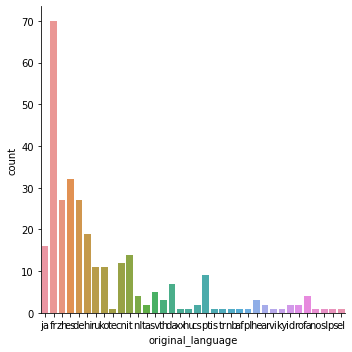

In [17]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts().to_frame().reset_index()

filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

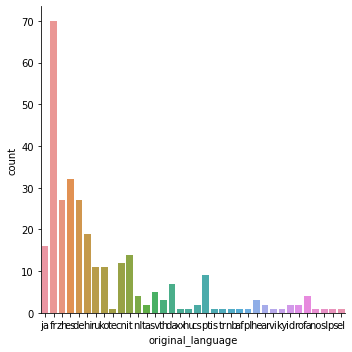

In [16]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

## 5. Keeping up with visualization

In [27]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv")

contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']


total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles


dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)


total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

<Figure size 360x720 with 0 Axes>

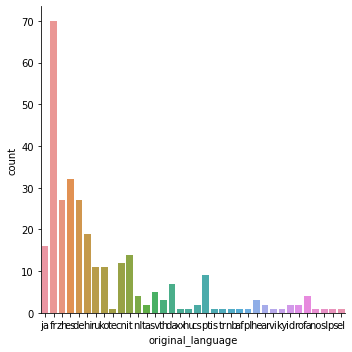

In [19]:
plt.figure(figsize=(5,10))

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

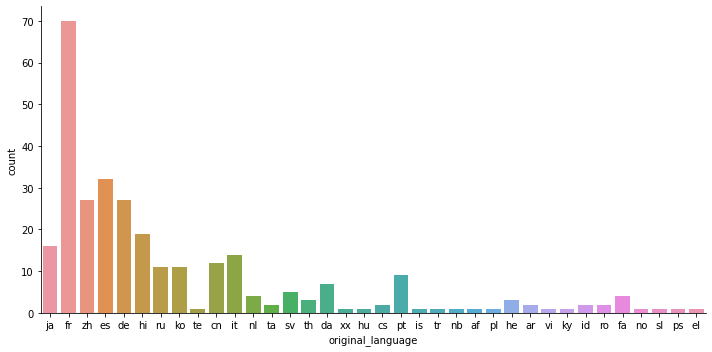

In [20]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count", aspect=2)

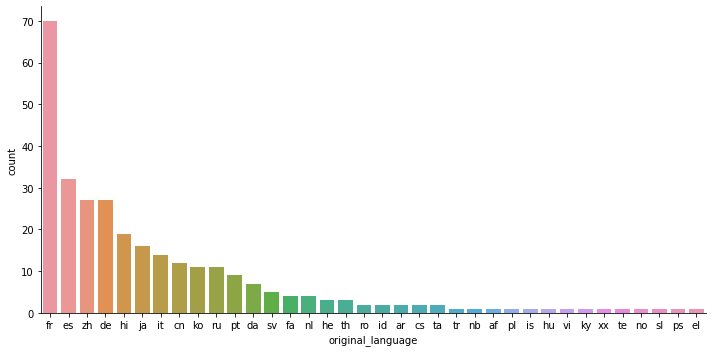

In [30]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index)

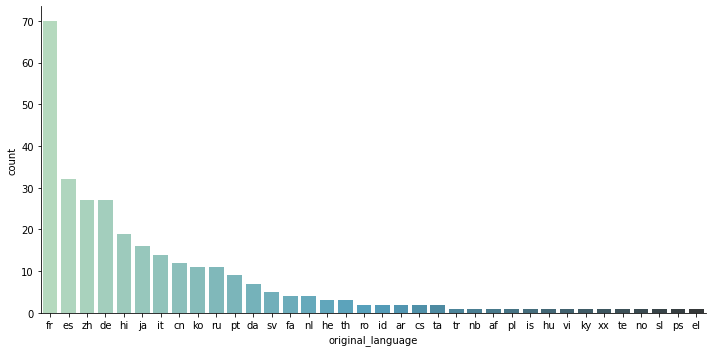

In [31]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, 
            kind="count", 
            aspect=2,
            palette="GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

#### seaborn example

Anscombe's quartet (similar descriptive statistics - mean, std - and contrasting distributions)

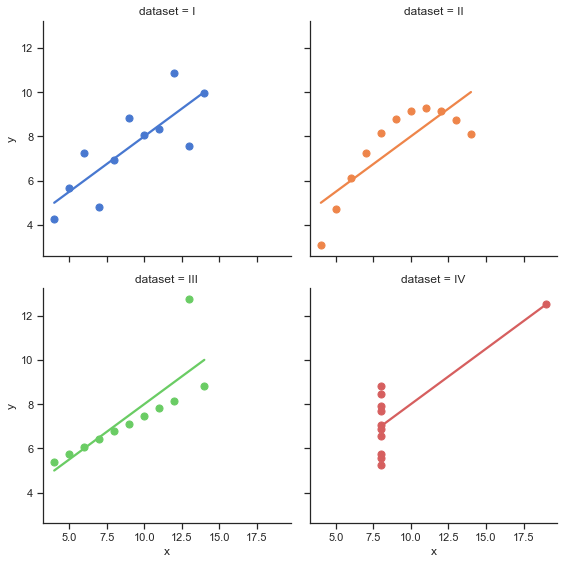

In [32]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## 6. Data, statistics, and exploratory analysis

Mean, median, standard deviation, boxplot, histogram, central tendency, and dispersion: how it all fits in

In [35]:
import zipfile
import pandas as pd

zf = zipfile.ZipFile('./data/ml-latest-small.zip') 

notas = pd.read_csv(zf.open('ml-latest-small/ratings.csv'))
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

filmes = pd.read_csv(zf.open('ml-latest-small/movies.csv'))
filmes.columns = ["filmeId", "titulo", "generos"]


Problem of central tendency

In [36]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [37]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [38]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


Problem of central tendency: example

In [41]:
import numpy as np

print(np.array([2.5] * 10), '\n\n', np.array([2.5] * 10).mean())

[2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5] 

 2.5


In [43]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dev\Documents\Python\alura-projects\python-alura-projects\data-science\data-analysis-and-visualization\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

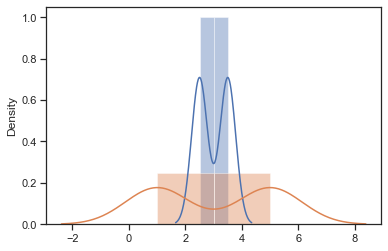

In [46]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

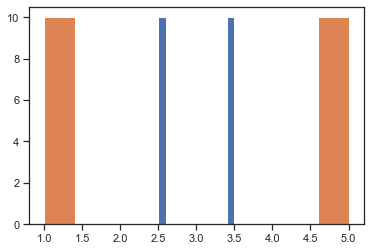

In [44]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a62a95db80>,
 'caps': [<matplotlib.lines.Line2D at 0x2a62a96c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a62a95d9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a62a96c730>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a62a96ca00>,
 'means': []}

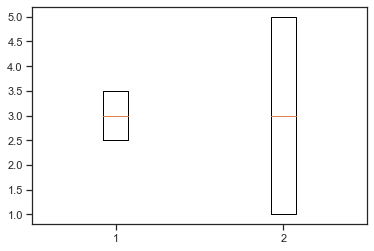

In [47]:
plt.boxplot([filme1,filme2])

Returning to movies

{'whiskers': [<matplotlib.lines.Line2D at 0x2a62a9df520>,
 'caps': [<matplotlib.lines.Line2D at 0x2a62a9dfac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a62a9df3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a62a9ea0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a62a9ea3a0>,
 'means': []}

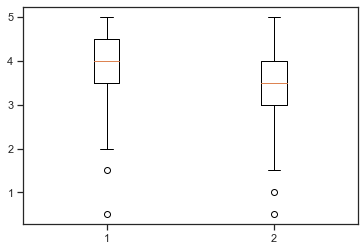

In [48]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

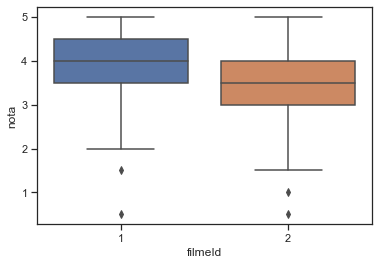

In [49]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

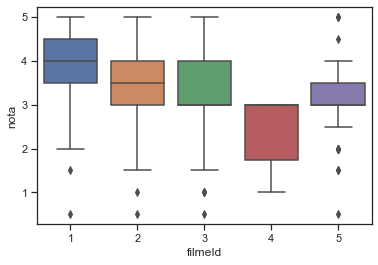

In [51]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

Standard deviation

In [52]:
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [53]:
print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


# Conclusion

Check out: Google Dataset Search - https://datasetsearch.research.google.com/
